<a href="https://colab.research.google.com/github/samobrien878/EDA/blob/main/Copy_of_assignment_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [1]:
! git clone https://github.com/DS3001/visualization


Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (34/34), 7.18 MiB | 6.75 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

#2.1

In [1]:
import pandas as pd
df = pd.read_csv('airbnb_hw.csv')
df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


In [3]:
df['Price'] = df['Price'].astype(str).str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'])

#2.2

There are 30,000 listings and 13 columns, detialing what the offerings are and where they are located.

#2.3

In [2]:
x = pd.crosstab(df['Room Type'], df['Property Type'])
x

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


It seems the vast majority of properties are apartments and the most room types available are the entirity of that property.

2.4

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


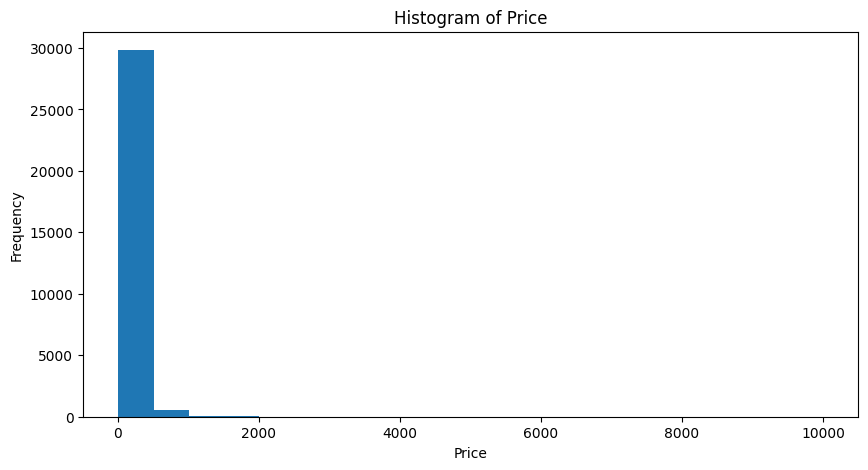

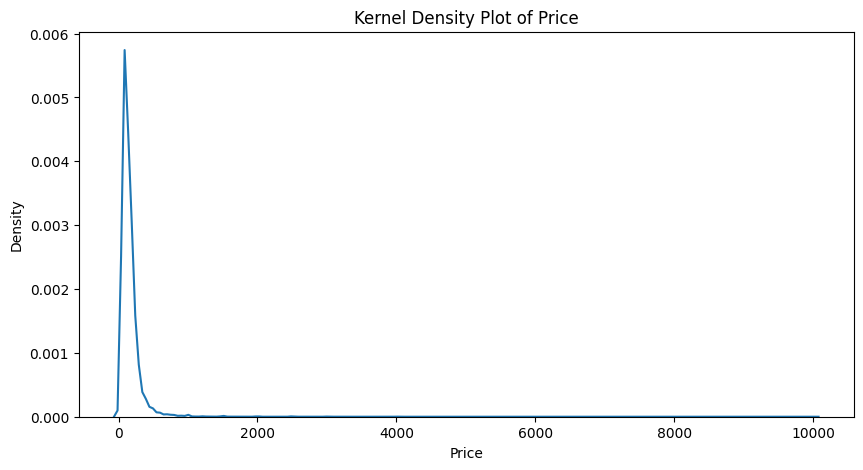

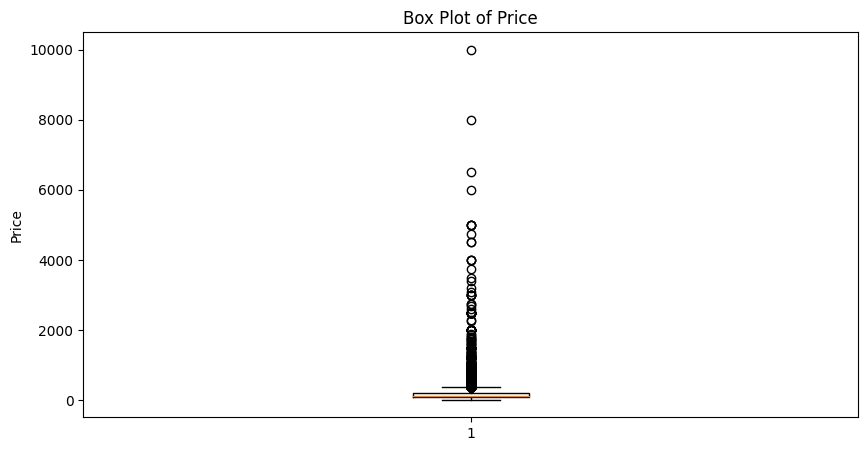

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64


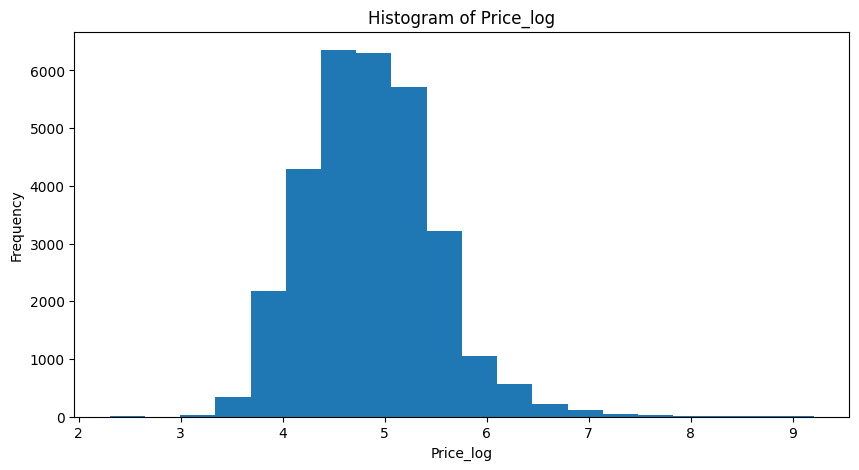

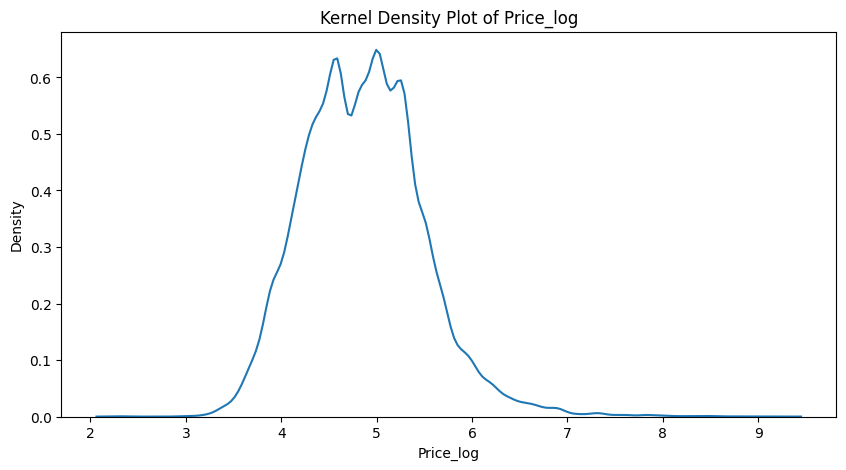

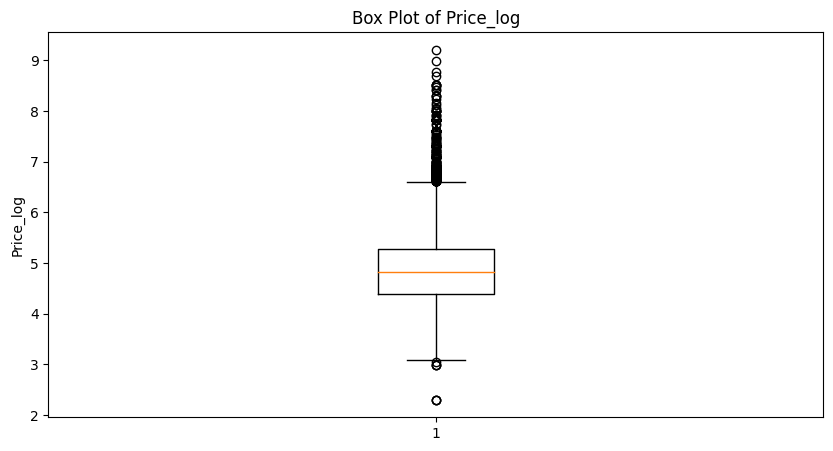

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(df['Price'].describe())


plt.figure(figsize=(10, 5))
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

# Kernel density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['Price'])
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price')
plt.show()

# Box plot
plt.figure(figsize=(10, 5))
plt.boxplot(df['Price'])
plt.ylabel('Price')
plt.title('Box Plot of Price')
plt.show()


# Log
df['Price_log'] = np.log(df['Price'])

print(df['Price_log'].describe())

plt.figure(figsize=(10, 5))
plt.hist(df['Price_log'], bins=20)
plt.xlabel('Price_log')
plt.ylabel('Frequency')
plt.title('Histogram of Price_log')
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(df['Price_log'])
plt.xlabel('Price_log')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price_log')
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(df['Price_log'])
plt.ylabel('Price_log')
plt.title('Box Plot of Price_log')
plt.show()

#2.5

<function matplotlib.pyplot.show(close=None, block=None)>

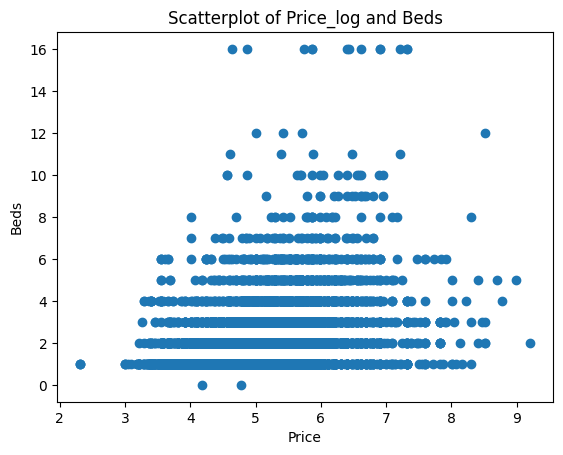

In [8]:
plt.scatter(df['Price_log'], df['Beds'])
plt.xlabel('Price')
plt.ylabel('Beds')
plt.title('Scatterplot of Price_log and Beds')
plt.show

In [9]:
print(df.groupby('Beds')['Price'].describe())

        count         mean          std    min     25%    50%      75%  \
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.21758

It appears as though as the number of beds increase, the mean price and mean standard deviation of price generally increase as well.

#2.6

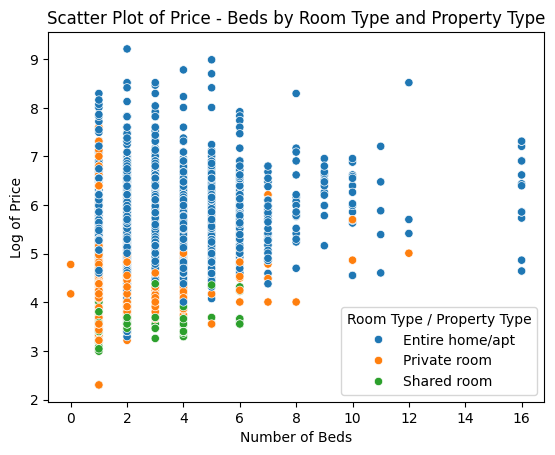

In [12]:
import seaborn as sns

sns.scatterplot(data=df, x='Beds', y='Price_log', hue='Room Type')

plt.xlabel("Number of Beds")
plt.ylabel("Log of Price")
plt.title("Scatter Plot of Price - Beds by Room Type and Property Type")

plt.legend(title='Room Type / Property Type')
plt.show()

In [13]:
print(df.groupby(['Room Type', 'Property Type'])['Price'].describe())

                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

Note, had to cut out the property type from graph because it was covering the whole thing, idea is still there.

It appears that entire houses/apartments, specifically villas, are the most expensive things to rent on Air BNB. I think that the median is a better measure of central tendency, espically in large and varied data such as this. For instance, the mean of "other" for entire homes and appartments is around 800, but the median is around 300.

#2.7

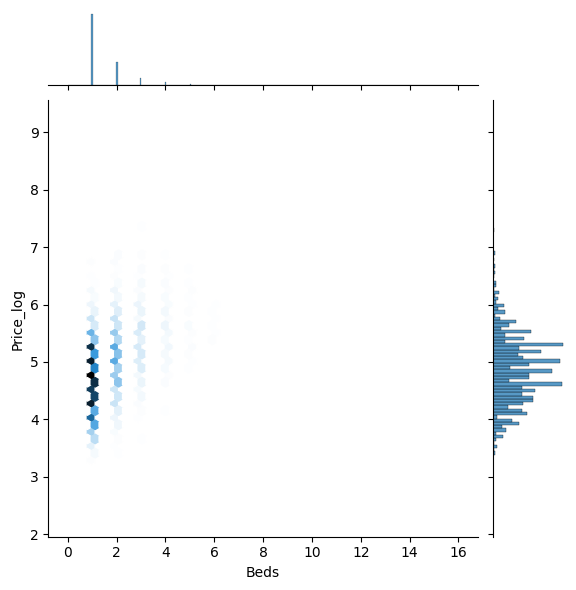

In [14]:
sns.jointplot(data=df, x='Beds', y='Price_log', kind='hex')
plt.show()

It appears that in reality, the vast majority of the data is made up of 1-4 bedroom rentals at a medium - low price. This makes me believe that some of the previous graphs may be slightly misleading due to the expensive outliers in the data.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

In [16]:
import json
import pandas as pd
import json
import requests

In [1]:
import requests

url = 'https://data.cms.gov/data-api/v1/dataset/d65b8be0-946e-410b-ab06-01829628d5a1/data' # Location of the API
query = '?format=json&ProductType=Exercise%20Equipment' # The query - Recall is not a valid parameter, use ProductType and replace space with %20
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'} # The user-agent to avoid being blocked
raw = requests.get(url+query,headers=header)
data = raw.json()

[{'PROVNUM': '015009',
  'STATE': 'AL',
  'CY_Qtr': '2024Q1',
  'WorkDate': '20240101',
  'SYS_EMPLEE_ID': '253548',
  'EMPLEE_JOB_CD_ID': '6',
  'EMP_CTR': '1',
  'WORK_HRS_NUM': '8',
  'WORK_HRS_FN': ''},
 {'PROVNUM': '015009',
  'STATE': 'AL',
  'CY_Qtr': '2024Q1',
  'WorkDate': '20240101',
  'SYS_EMPLEE_ID': '543795',
  'EMPLEE_JOB_CD_ID': '7',
  'EMP_CTR': '1',
  'WORK_HRS_NUM': '5.29',
  'WORK_HRS_FN': ''},
 {'PROVNUM': '015009',
  'STATE': 'AL',
  'CY_Qtr': '2024Q1',
  'WorkDate': '20240101',
  'SYS_EMPLEE_ID': '1380048',
  'EMPLEE_JOB_CD_ID': '10',
  'EMP_CTR': '1',
  'WORK_HRS_NUM': '7.82',
  'WORK_HRS_FN': ''},
 {'PROVNUM': '015009',
  'STATE': 'AL',
  'CY_Qtr': '2024Q1',
  'WorkDate': '20240101',
  'SYS_EMPLEE_ID': '1666173',
  'EMPLEE_JOB_CD_ID': '9',
  'EMP_CTR': '1',
  'WORK_HRS_NUM': '1.23',
  'WORK_HRS_FN': ''},
 {'PROVNUM': '015009',
  'STATE': 'AL',
  'CY_Qtr': '2024Q1',
  'WorkDate': '20240101',
  'SYS_EMPLEE_ID': '2000335',
  'EMPLEE_JOB_CD_ID': '10',
  'EMP_CTR': '

In [42]:
df = pd.DataFrame(data)
df

,PROVNUM,STATE,CY_Qtr,WorkDate,SYS_EMPLEE_ID,EMPLEE_JOB_CD_ID,EMP_CTR,WORK_HRS_NUM,WORK_HRS_FN
0,015009,AL,2024Q1,20240101,253548,6,1,8,
1,015009,AL,2024Q1,20240101,543795,7,1,5.29,
2,015009,AL,2024Q1,20240101,1380048,10,1,7.82,
3,015009,AL,2024Q1,20240101,1666173,9,1,1.23,
4,015009,AL,2024Q1,20240101,2000335,10,1,8.48,
...,...,...,...,...,...,...,...,...,...
995,015009,AL,2024Q1,20240128,21205060,10,1,7.85,
996,015009,AL,2024Q1,20240128,21205233,10,1,6.77,
997,015009,AL,2024Q1,20240128,21205314,10,1,8.32,
998,015009,AL,2024Q1,20240128,21205354,7,1,7.77,


I would say that this data set does a good job explaining what the data are and any missing variables. Specifically, they mention that there was a ransomwear attack at one of the provider locations that caused about 900 missing values. However, they do not detail what happens with missing categorical variables or missing numeric variables specifically.

In [11]:
codes = {
    1: "Administrator",
    2: "Medical Director",
    3: "Other Physician",
    4: "Physician Assistant",
    5: "RN Director of Nursing",
    6: "RN with Administrative Duties",
    7: "Registered Nurse",
    8: "LPN with Administrative Duties",
    9: "Licensed Practical/Vocational Nurse",
    10: "Certified Nurse Aide",
    11: "Nurse Aide in Training",
    12: "Medication Aide/Technician",
    13: "Nurse Practitioner",
    14: "Clinical Nurse Specialist",
    15: "Pharmacist",
    16: "Dietitian",
    17: "Food Service Work",
    18: "Occupational Therapist",
    19: "Occupational Therapy Assistant",
    20: "Occupational Therapy Aide",
    21: "Physical Therapist",
    22: "Physical Therapy Assistant",
    23: "Physical Therapy Aide",
    24: "Respiratory Therapist",
    25: "Respiratory Therapy Technician",
    26: "Speech/Language Pathologist",
    27: "Therapeutic Recreation Specialist",
    28: "Qualified Activities Professional",
    29: "Other Activities Staff",
    30: "Qualified Social Worker",
    31: "Other Social Worker"
}


In [55]:
df['WorkDate'] = pd.to_numeric(df['WorkDate'])
min_date = df['WorkDate'].min()
max_date = df['WorkDate'].max()

print(f"This data is over a", str(max_date % 100 - min_date % 100), "day period!!!")

This data is over a 27 day period!!!


In [12]:
codes = {str(key): value for key, value in codes.items()}

for i in df['EMPLEE_JOB_CD_ID'].unique():
  if i in codes:
    df['EMPLEE_JOB_CD_ID'] = df['EMPLEE_JOB_CD_ID'].replace(i, codes[i])

The two variables I thought were jointly interesting: Job title and hours worked. I thought it could be interesting to look over which individuals, and with jobs as a whole work the most hours over this month period at this specific locaiton.

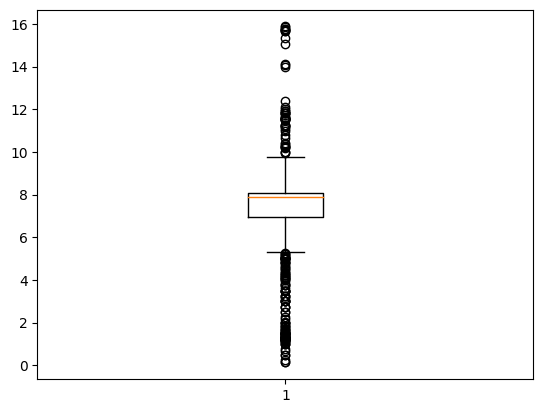

In [46]:
df['WORK_HRS_NUM'] = pd.to_numeric(df['WORK_HRS_NUM'], errors='coerce')

plt.boxplot(df['WORK_HRS_NUM'])
plt.show()
ylabel = 'Instance Of Hours Worked'

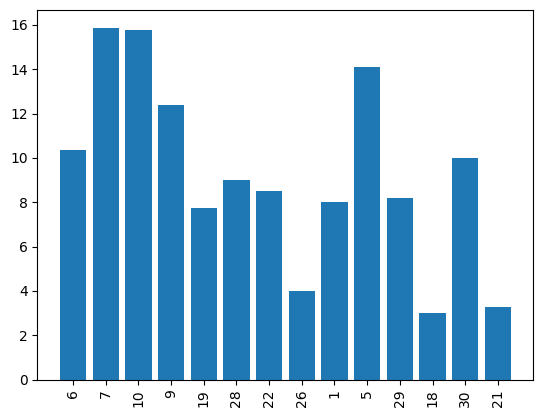

In [47]:
plt.bar(df['EMPLEE_JOB_CD_ID'], df['WORK_HRS_NUM'])
plt.xticks(rotation=90)
plt.show()
title = 'Hours Worked by Job Title'

There arent any outliers jumping out, some people work lots of hours some people work less hours. It doesn't seem like I need to rescale anything.

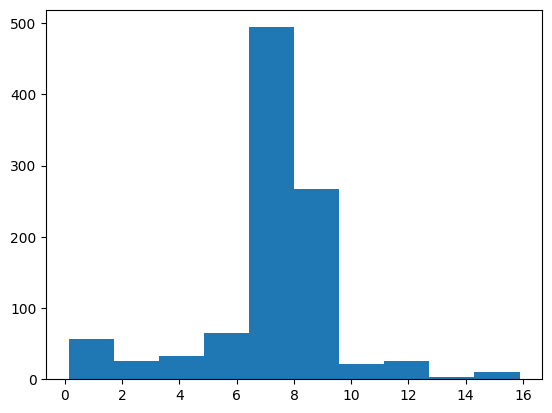

In [37]:
plt.hist(df['WORK_HRS_NUM'])
plt.show()

There are a few people who work 16 hour shifts, but generally people work 8 hour shifts.

In [41]:
df.groupby('EMPLEE_JOB_CD_ID')['WORK_HRS_NUM'].describe()

,count,mean,std,min,25%,50%,75%,max
EMPLEE_JOB_CD_ID,,,,,,,,
Administrator,20.0,8.000000,0.000000,8.00,8.0000,8.000,8.000,8.00
Certified Nurse Aide,504.0,7.458353,2.014560,0.17,7.3050,7.810,8.070,15.75
Licensed Practical/Vocational Nurse,88.0,6.779773,2.554880,0.13,6.5450,7.780,8.110,12.39
Occupational Therapist,8.0,1.406250,0.812157,0.25,1.0000,1.250,1.625,3.00
Occupational Therapy Assistant,21.0,6.202381,0.967016,4.25,6.0000,6.250,6.750,7.75
Other Activities Staff,39.0,7.410513,1.640667,0.78,7.6000,8.020,8.080,8.19
Physical Therapist,6.0,1.750000,1.172604,0.50,0.6875,1.750,2.625,3.25
Physical Therapy Assistant,21.0,6.988095,0.943650,5.00,6.5000,7.000,7.500,8.50
Qualified Activities Professional,20.0,7.772500,1.077472,3.64,7.9525,8.065,8.190,9.01


It looks like most titles work around 8 hours per day, with some specialties working less than 2 hours per day. (thats week im jealous.)

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

#Extra stuff I did for fun

#Most hours worked by individual employee over the timeline of whatever I could download.

In [13]:
df['WORK_HRS_NUM'] = pd.to_numeric(df['WORK_HRS_NUM'])
hours_worked = df.groupby(['SYS_EMPLEE_ID', 'EMPLEE_JOB_CD_ID'])['WORK_HRS_NUM'].sum()
hours_worked = hours_worked.sort_values(ascending=False)

days_worked = df.groupby('SYS_EMPLEE_ID')['SYS_EMPLEE_ID'].count()
hours_worked = hours_worked.reset_index()
hours_worked['Days Worked'] = hours_worked['SYS_EMPLEE_ID'].map(days_worked)

top = hours_worked.head(10)
top


,SYS_EMPLEE_ID,EMPLEE_JOB_CD_ID,WORK_HRS_NUM,Days Worked
0,4603482,RN Director of Nursing,195.10,21
1,3156189,Registered Nurse,191.61,23
2,10122042,Registered Nurse,170.86,21
3,21205017,Certified Nurse Aide,167.86,26
4,8238506,Certified Nurse Aide,165.19,20
5,22408773,Certified Nurse Aide,164.36,20
6,3444461,Qualified Social Worker,161.17,19
7,25264477,Certified Nurse Aide,160.21,19
8,4603556,Certified Nurse Aide,160.00,20
9,4014409,Administrator,160.00,20


In [36]:
most_hours_title = df.groupby(['EMPLEE_JOB_CD_ID'])['WORK_HRS_NUM'].sum()
most_hours_title = most_hours_title.sort_values(ascending=False)
most_hours_title = most_hours_title.head(10)
most_hours_title

,WORK_HRS_NUM
EMPLEE_JOB_CD_ID,
Certified Nurse Aide,3759.01
Registered Nurse,1347.72
Licensed Practical/Vocational Nurse,596.62
RN with Administrative Duties,311.46
Other Activities Staff,289.01
RN Director of Nursing,195.10
Qualified Social Worker,161.17
Administrator,160.00
Qualified Activities Professional,155.45


#Plot the top emoloyees hours

In [23]:
top_employee = df[df['SYS_EMPLEE_ID'] == top.iloc[0]['SYS_EMPLEE_ID']]
list = []
for i, row in df.iterrows():
    if row['SYS_EMPLEE_ID'] == top.iloc[0]['SYS_EMPLEE_ID']:
        list.append(row)
top_employee = pd.DataFrame(list)

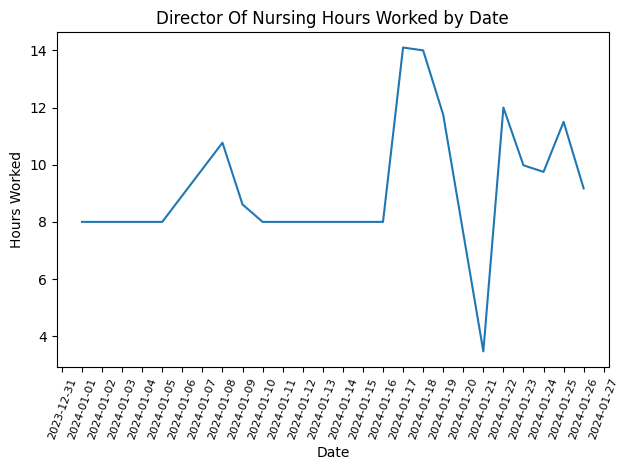

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.plot(top_employee['WorkDate'], top_employee['WORK_HRS_NUM'])
plt.xlabel('Date')
plt.ylabel('Hours Worked')
plt.title('Director Of Nursing Hours Worked by Date')

plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(fontsize=8, rotation=70)

plt.tight_layout()
plt.show()